C:\Users\Paul\miniconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Erreur 3 voisins:  0.150000


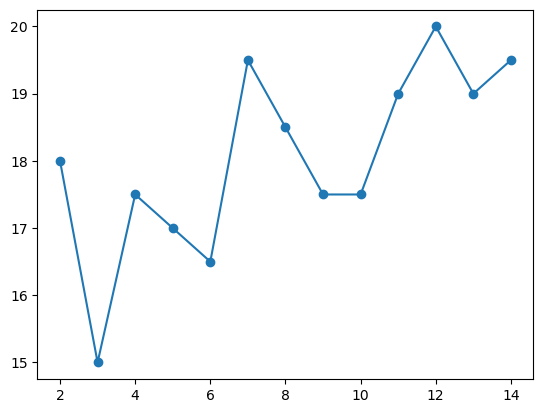

Meilleur classifieur : k = 3, avec une erreur de 15.00%


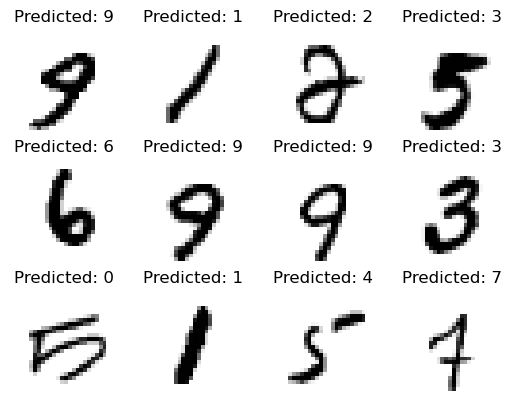

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn import neighbors
from sklearn.model_selection import train_test_split
global mnist
mnist = fetch_openml('mnist_784', version=1)

sample = np.random.randint(70000, size=1000)
data = mnist.data.to_numpy()[sample]

target = mnist.target.iloc[sample]


xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)
error = 1 - knn.score(xtest, ytest)
print('Erreur 3 voisins:  %f' % error)

errors = {}
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    knn.fit(xtrain, ytrain)
    errors[k] = 100*(1 - knn.score(xtest, ytest))
    
plt.plot(range(2,15), errors.values(), 'o-')
plt.show()

best_k = min(errors, key=errors.get)
print('Meilleur classifieur : k = {}, avec une erreur de {:.2f}%'.format(best_k, errors[best_k]))


# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(best_k)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

# On redimensionne les données sous forme d'images
images = xtest.reshape((-1, 28, 28))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)

# On affiche les images avec la prédiction associée
fig,ax = plt.subplots(3,4)

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( predicted[value]) )

plt.show()




In [ ]:



# récupérer les prédictions du KNN pour les images de test
y_pred = knn.predict(xtest)

# créer un dictionnaire pour stocker les indices des images pour chaque chiffre
indices = {}
for i in range(10):
    indices[i] = np.where(ytrain == str(i))[0]

# calculer la moyenne des images pour chaque chiffre
mean_images = []
for i in range(10):
    mean_image = np.mean(xtrain[indices[i]], axis=0)
    mean_images.append(mean_image)

# afficher les 9 images représentatives pour chaque chiffre
fig, axs = plt.subplots(10, 9, figsize=(9, 10))
for i in range(10):
    for j in range(9):
        if j == 0:
            axs[i, j].imshow(mean_images[i].reshape(28, 28), cmap='gray')
            axs[i, j].set_title(str(i))
        else:
            axs[i, j].imshow(xtrain[indices[i][j-1]].reshape(28, 28), cmap='gray')
        axs[i, j].axis('off')
plt.show()